In [2]:
import pandas as pd

# prenoms inventés
mean_diff = pd.read_csv("data/clean/influenced_names_means_diff.csv")
influenced_meandiff = mean_diff[mean_diff["Influence"] > 0]
# removing common identification mistakes such as "the", "a" or "Mr"
influenced_meandiff = influenced_meandiff[~influenced_meandiff["Character Name"].isin(["the", "a", "Mr"])]
print("Number of influenced names with mean diff: ", len(influenced_meandiff))
influenced_meandiff.head()



Number of influenced names with mean diff:  1585


,Wikipedia ID,Movie Name,Year,Character Name,Count,Full name,Normalized_name,Influence
0,31186339,the hunger games,2012,Katniss,4,Katniss,KATNISS,inf
1,22144721,iron man 2,2010,Stark,3,Howard Stark,STARK,inf
2,146947,spider-man,2002,Osborn,6,Harry Osborn,OSBORN,inf
4,443972,hook,1991,Banning,16,Peter Banning,BANNING,inf
5,537416,ace ventura: when nature calls,1995,Abbot,2,Grand Abbot,ABBOT,inf


In [3]:
# tous les prénoms influencés
prophet = pd.read_csv("data/clean/influenced_names_prophet.csv")
influenced_prophet = prophet[prophet["Influenced"] > 0]
# removing common identification mistakes such as "the", "a" or "Mr"
influenced_prophet = influenced_prophet[~influenced_prophet["Character Name"].isin(["the", "a", "Mr"])]
print("Number of influenced names with mean diff: ", len(influenced_prophet))
influenced_prophet.head()

Number of influenced names with mean diff:  432


,Wikipedia ID,Movie Name,Year,Character Name,Count,Full name,Normalized_name,Mean Difference,Influenced
0,451866,mission: impossible ii,2000,Ethan,18,Ethan Hunt,ETHAN,15725.466667,1
1,633411,the avengers,1998,Emma,15,Emma Peel,EMMA,14985.966667,1
2,3727473,man on fire,1987,Samantha,4,"Samantha ""Sam"" Balletto",SAMANTHA,14453.500000,1
3,347000,suspiria,1977,Sarah,15,Sarah,SARAH,14372.466667,1
5,320401,barton fink,1991,Taylor,3,Audrey Taylor,TAYLOR,13892.100000,1


In [4]:
#remove every non numeric value in mean diff
mean_diff = mean_diff[mean_diff["Influence"].apply(lambda x: str(x).replace(".", "").isdigit())]
threshold = mean_diff['Influence'].quantile(0.75)

significant_names = mean_diff[mean_diff['Influence'] > threshold]
print("Number of significant names:", len(significant_names))
significant_names.head()

Number of significant names: 371


,Wikipedia ID,Movie Name,Year,Character Name,Count,Full name,Normalized_name,Influence
151,451866,mission: impossible ii,2000,Ethan,18,Ethan Hunt,ETHAN,15725.466667
152,633411,the avengers,1998,Emma,15,Emma Peel,EMMA,14985.966667
153,3727473,man on fire,1987,Samantha,4,"Samantha ""Sam"" Balletto",SAMANTHA,14453.500000
154,347000,suspiria,1977,Sarah,15,Sarah,SARAH,14372.466667
155,483274,point break,1991,Tyler,3,Tyler Endicott,TYLER,14176.666667


In [7]:
cmu_imdb_merged = pd.read_csv("data/clean/cmu_imdb_merged.csv")
cmu_imdb_merged.head(1)

,Wikipedia_movie_ID,Movie_name,Release_date,Revenue,Runtime,Languages,Countries,Genres,weightedAverageRating,totalVotes,is_blockbuster
0,29988427.0,!women art revolution,2010-01-01,NaN,0 days 01:23:00,English,"United States of America, Canada","LGBT, History, Documentary",6.9,262.0,False


In [54]:
# Perform a merge based on 'Wikipedia ID' (from influenced_prophet) and 'Wikipedia_movie_ID' (from cmu_imdb_merged)
merged_df = influenced_prophet.merge(
    cmu_imdb_merged[['Wikipedia_movie_ID', 'Genres']],  # Keep only relevant columns
    left_on="Wikipedia ID", 
    right_on="Wikipedia_movie_ID", 
    how="left"
)
# Drop redundant column after the merge
#merged_df.drop(columns=['Wikipedia_movie_ID'], inplace=True)

# Display the result
print("Merged Dataset:")
display(merged_df.head(1))

# Save the new dataset with Genres
#merged_df.to_csv("data/clean/influenced_prophet_with_genres.csv", index=False)
#print("Dataset saved successfully with Genres added!")


Merged Dataset:


,Wikipedia ID,Movie Name,Year,Character Name,Count,Full name,Normalized_name,Mean Difference,Influenced,Wikipedia_movie_ID,Genres
0,451866,mission: impossible ii,2000,Ethan,18,Ethan Hunt,ETHAN,15725.466667,1,451866.0,"Thriller, Action Thrillers, Action/Adventure, ..."


In [41]:
merged_df['Genres'] = merged_df['Genres'].str.split(', ')
merged_df.head()


,Wikipedia ID,Movie Name,Year,Character Name,Count,Full name,Normalized_name,Mean Difference,Influenced,Wikipedia_movie_ID,Genres
0,451866,mission: impossible ii,2000,Ethan,18,Ethan Hunt,ETHAN,15725.466667,1,451866.0,"[Thriller, Action Thrillers, Action/Adventure,..."
1,633411,the avengers,1998,Emma,15,Emma Peel,EMMA,14985.966667,1,633411.0,"[Thriller, Adventure, Action/Adventure, Comedy..."
2,3727473,man on fire,1987,Samantha,4,"Samantha ""Sam"" Balletto",SAMANTHA,14453.500000,1,3727473.0,"[Thriller, Action, Drama, Indie]"
3,347000,suspiria,1977,Sarah,15,Sarah,SARAH,14372.466667,1,347000.0,"[Horror, World cinema, Supernatural, Gothic Fi..."
4,320401,barton fink,1991,Taylor,3,Audrey Taylor,TAYLOR,13892.100000,1,320401.0,"[Thriller, Indie, Comedy-drama, Mystery, Perio..."


In [43]:
exploded_df = merged_df.explode('Genres')


In [44]:
genre_counts = exploded_df['Genres'].value_counts()
print("Genre Counts:",  genre_counts)

Genre Counts: Genres
Drama                       210
Thriller                    159
Action                      159
Action/Adventure            128
Comedy                      121
                           ... 
Stoner film                   1
Private military company      1
Childhood Drama               1
Inspirational Drama           1
Epic Western                  1
Name: count, Length: 185, dtype: int64


In [45]:
genre_mean_influence = exploded_df.groupby('Genres')['Mean Difference'].mean().sort_values(ascending=False)


In [46]:
# 5. Afficher les résultats
print("Nombre de prénoms influencés par genre :")
display(genre_counts.head(10))  # Top 10 genres

print("\nInfluence moyenne par genre :")
display(genre_mean_influence.head(10))  # Top 10 genres par influence moyenne



Nombre de prénoms influencés par genre :


Genres
Drama               210
Thriller            159
Action              159
Action/Adventure    128
Comedy              121
Crime Fiction       100
Romance Film         93
Adventure            88
Science Fiction      86
Horror               58
Name: count, dtype: int64


Influence moyenne par genre :


Genres
Glamorized Spy Film          9425.227778
Gothic Film                  8296.677778
Spy                          6740.085417
Costume Horror               5517.866667
Auto racing                  4056.733333
Heaven-Can-Wait Fantasies    2943.966667
Blaxploitation               2534.433333
Buddy cop                    2504.611111
Action Thrillers             2435.469608
Supernatural                 2401.844444
Name: Mean Difference, dtype: float64

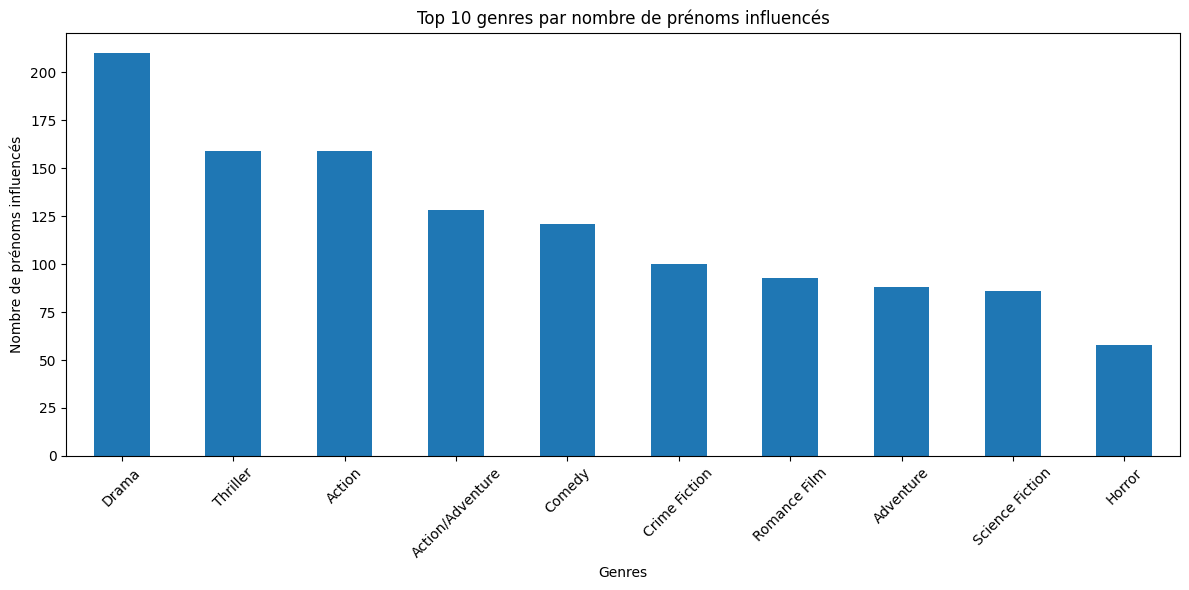

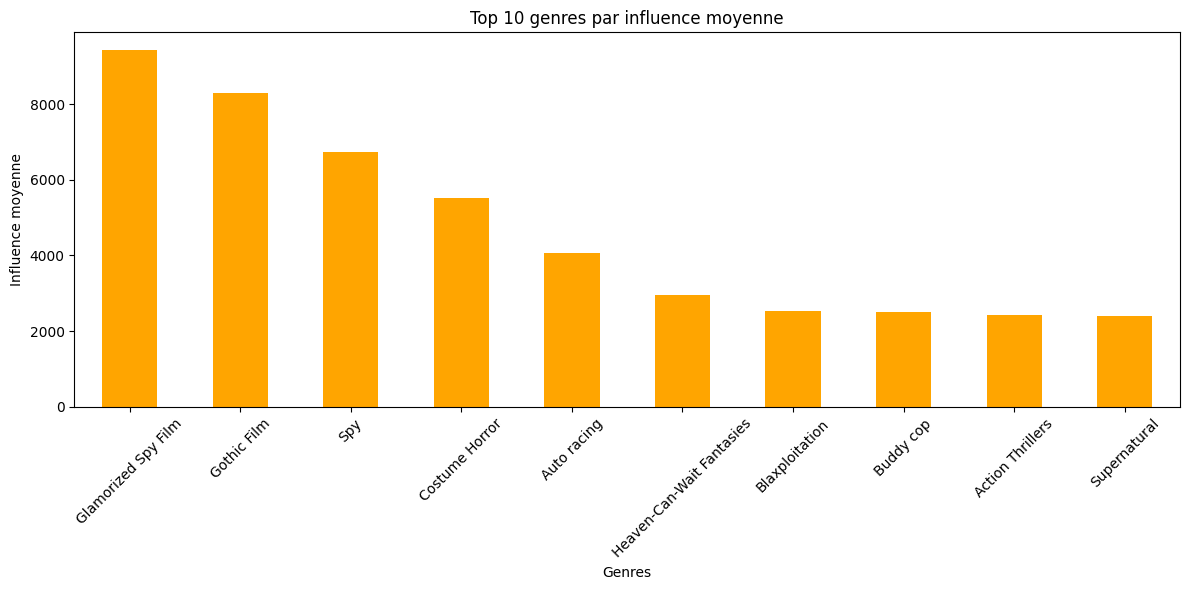

In [36]:
# 6. Visualiser les résultats
import matplotlib.pyplot as plt

# Graphique : Nombre de prénoms influencés par genre
plt.figure(figsize=(12, 6))
genre_counts.head(10).plot(kind='bar')
plt.title("Top 10 genres par nombre de prénoms influencés")
plt.ylabel("Nombre de prénoms influencés")
plt.xlabel("Genres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Graphique : Influence moyenne par genre
plt.figure(figsize=(12, 6))
genre_mean_influence.head(10).plot(kind='bar', color='orange')
plt.title("Top 10 genres par influence moyenne")
plt.ylabel("Influence moyenne")
plt.xlabel("Genres")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### new trial

In [81]:
import pandas as pd
import plotly.graph_objects as go

# Étape 1: Préparer les données
merged_df = pd.read_csv("data/clean/influenced_prophet_with_genres.csv")
merged_df['Genres'] = merged_df['Genres'].str.split(', ')
exploded_df = merged_df.explode('Genres')  # Séparer les genres

# Calculer l'influence totale par genre
top_25_genres = (
    exploded_df.groupby('Genres')['Mean Difference']
    .sum()
    .reset_index()
    .sort_values(by='Mean Difference', ascending=False)
    .head(25)['Genres']  # Garde les 25 genres les plus influents
)

# Filtrer les données pour ne garder que ces 25 genres
filtered_df = exploded_df[exploded_df['Genres'].isin(top_25_genres)]

# Calculer le Top 3 des prénoms influencés pour chaque genre
top_names_by_genre = (
    filtered_df.groupby(['Genres', 'Normalized_name'])['Mean Difference']
    .sum()
    .reset_index()
    .sort_values(['Genres', 'Mean Difference'], ascending=[True, False])
    .groupby('Genres')
    .head(3)  # Prendre le top 3 par genre
)

# Liste unique des 25 genres
unique_genres = top_names_by_genre['Genres'].unique()

# Étape 2: Créer le graphique initial avec le premier genre
initial_genre = unique_genres[0]
initial_data = top_names_by_genre[top_names_by_genre['Genres'] == initial_genre]

# Création de la figure
fig = go.Figure()

# Ajouter les barres pour le graphique initial
fig.add_trace(go.Bar(
    x=initial_data['Normalized_name'],
    y=initial_data['Mean Difference'],
    name=initial_genre
))

# Étape 3: Configurer les étapes du slider
steps = []
for genre in unique_genres:
    filtered_data = top_names_by_genre[top_names_by_genre['Genres'] == genre]
    step = dict(
        method="update",
        args=[{"x": [filtered_data['Normalized_name']],
               "y": [filtered_data['Mean Difference']],
               "type": "bar"},
              {"title": f"Top 3 prénoms influencés par le genre '{genre}'"}],
        label=genre
    )
    steps.append(step)

# Étape 4: Configuration du slider
sliders = [dict(
    active=0,
    currentvalue={"prefix": "Genre: "},
    pad={"t": 50},
    steps=steps
)]

# Mettre à jour le layout
fig.update_layout(
    title=f"Top 3 influences names by movies, per genre'{initial_genre}'",
    xaxis_title="Names",
    yaxis_title="Mean of influence",
    sliders=sliders,
    template="plotly_white"
)

# Étape 5: Afficher le graphique
fig.show()


In [82]:
fig.write_html("docs/_includes/top3_influenced_names_by_genres.html")